In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML_LAB/Salary_Data.csv")

In [ ]:
data.head(20)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


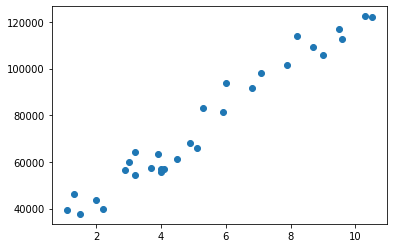

In [ ]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.show()

Correlating Data

In [ ]:
corr = data.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Splitting Data

In [ ]:
train_data, test_data = train_test_split(data, test_size=.2, random_state=42)

In [ ]:
train_x, train_y = np.array(train_data['YearsExperience']).reshape(-1,1),np.array(train_data['Salary']).reshape(-1,1)
test_x, test_y = np.array(test_data['YearsExperience']).reshape(-1,1),np.array(test_data['Salary']).reshape(-1,1)

In [ ]:
print(train_y)

[[122391.]
 [109431.]
 [ 56957.]
 [ 39343.]
 [ 39891.]
 [ 66029.]
 [ 56642.]
 [ 57081.]
 [ 55794.]
 [101302.]
 [ 46205.]
 [ 37731.]
 [105582.]
 [ 43525.]
 [ 98273.]
 [116969.]
 [ 81363.]
 [121872.]
 [ 91738.]
 [ 54445.]
 [ 63218.]
 [ 61111.]
 [ 93940.]
 [ 60150.]]


Creating Model


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
train_x

array([[ 1.77445774],
       [ 1.21912622],
       [-0.41216011],
       [-1.41869849],
       [-1.03690807],
       [-0.03036969],
       [-0.79395053],
       [-0.37745189],
       [-0.41216011],
       [ 0.94146047],
       [-1.34928205],
       [-1.27986561],
       [ 1.32325088],
       [-1.10632451],
       [ 0.66379471],
       [ 1.49679198],
       [ 0.24729607],
       [ 1.84387418],
       [ 0.55967005],
       [-0.68982587],
       [-0.44686833],
       [-0.23861901],
       [ 0.28200429],
       [-0.75924231]])

In [ ]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [ ]:
model.score(train_x,train_y)

0.9645401573418148

In [ ]:
score = cross_val_score(model, train_x,train_y,scoring='neg_mean_absolute_error',cv=3)
score = (-score)
score.mean()

4332.312200086067

In [ ]:
test_x = scaler.transform(test_x)
test_predict = model.predict(test_x)
score = mean_absolute_error(test_y,test_predict)
score

6286.453830757746

In [ ]:
model.score(test_x,test_y)

0.9024461774180498

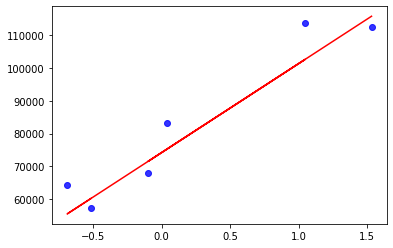

In [ ]:
plt.scatter(test_x,test_y,color = 'b',alpha = 0.8)
plt.plot(test_x,test_predict,color='r')
plt.show()